<h2>In-class transcript from Lecture 10, February 13, 2019</h2> 


# Imports and defs for lecture

In [1]:
# These are the standard imports for CS 111. 
# This list may change as the quarter goes on.

import os
import math
import time
import struct
import json
import pandas as pd
import networkx as nx
import numpy as np
import numpy.linalg as npla
import scipy
import scipy.sparse.linalg as spla
from scipy import sparse
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib tk


In [2]:
def make_M_from_E(E):
    """Make the PageRank matrix from the adjacency matrix of a graph
    """
    n = E.shape[0]
    outdegree = np.sum(E,0)
    for j in range(n):
        if outdegree[j] == 0:
            E[:,j] = np.ones(n)
            E[j,j] = 0
    A = E / np.sum(E,0)
    S = np.ones((n,n)) / n
    m = 0.15
    M = (1 - m) * A + m * S
    return M

In [3]:
np.set_printoptions(precision = 4)

# Lecture starts here

In [8]:
E = np.load('PageRankEG1.npy')
E

array([[0., 0., 1., 1.],
       [1., 0., 0., 0.],
       [1., 1., 0., 1.],
       [1., 1., 0., 0.]])

In [11]:
indegree = np.sum(E,0)
indegree

array([3., 2., 1., 2.])

In [12]:
outdegree = np.sum(E,1)
outdegree

array([2., 1., 3., 2.])

In [14]:
n = E.shape[0]
n

4

In [15]:
d, V = linalg.eig(E)

In [16]:
d

array([ 1.9498+0.j    , -0.7454+0.7495j, -0.7454-0.7495j, -0.459 +0.j    ])

In [17]:
E

array([[0., 0., 1., 1.],
       [1., 0., 0., 0.],
       [1., 1., 0., 1.],
       [1., 1., 0., 0.]])

In [18]:
sum(E,0)

array([3., 2., 1., 2.])

In [22]:
A = E / np.sum(E,0)
A

array([[0.    , 0.    , 1.    , 0.5   ],
       [0.3333, 0.    , 0.    , 0.    ],
       [0.3333, 0.5   , 0.    , 0.5   ],
       [0.3333, 0.5   , 0.    , 0.    ]])

In [21]:
d, V = linalg.eig(A)
d

array([ 1.    +0.j   , -0.3606+0.411j, -0.3606-0.411j, -0.2788+0.j   ])

In [25]:
v = V[:,0].real
v

array([0.721 , 0.2403, 0.5408, 0.3605])

In [41]:
eig_perm = np.argsort(v)[::-1]
eig_perm

array([0, 2, 3, 1])

In [26]:
A @ v

array([0.721 , 0.2403, 0.5408, 0.3605])

In [27]:
np.sum(A,0)

array([1., 1., 1., 1.])

In [28]:
A.T

array([[0.    , 0.3333, 0.3333, 0.3333],
       [0.    , 0.    , 0.5   , 0.5   ],
       [1.    , 0.    , 0.    , 0.    ],
       [0.5   , 0.    , 0.5   , 0.    ]])

In [30]:
np.sum(A.T,0)

array([1.5   , 0.3333, 1.3333, 0.8333])

In [31]:
A.T @ np.array([1,1,1,1])

array([1., 1., 1., 1.])

In [32]:
E

array([[0., 0., 1., 1.],
       [1., 0., 0., 0.],
       [1., 1., 0., 1.],
       [1., 1., 0., 0.]])

In [33]:
E[0,2] = 0
E

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 1., 0., 1.],
       [1., 1., 0., 0.]])

In [35]:
A = E / np.sum(E,0)
A

/Users/gilbert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[0.    , 0.    ,    nan, 0.5   ],
       [0.3333, 0.    ,    nan, 0.    ],
       [0.3333, 0.5   ,    nan, 0.5   ],
       [0.3333, 0.5   ,    nan, 0.    ]])

In [36]:
linalg.eig(A)

ValueError: array must not contain infs or NaNs

In [37]:
E

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 1., 0., 1.],
       [1., 1., 0., 0.]])

In [39]:
E[:,2] = np.ones(n)
E[2,2] = 0
E

array([[0., 0., 1., 1.],
       [1., 0., 1., 0.],
       [1., 1., 0., 1.],
       [1., 1., 1., 0.]])

In [40]:
A = E / np.sum(E,0)
A

array([[0.    , 0.    , 0.3333, 0.5   ],
       [0.3333, 0.    , 0.3333, 0.    ],
       [0.3333, 0.5   , 0.    , 0.5   ],
       [0.3333, 0.5   , 0.3333, 0.    ]])

In [42]:
d, V = linalg.eig(A)
d

array([ 1.    +0.j    , -0.3333+0.2357j, -0.3333-0.2357j, -0.3333+0.j    ])

In [45]:
v = V[:,0].real

In [46]:
eig_perm = np.argsort(v)[::-1]
eig_perm

array([2, 3, 0, 1])

In [47]:
E2 = np.load('PageRankEG2.npy')
E2

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [48]:
A = E2 / np.sum(E2,0)
A

array([[0. , 1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0.5],
       [0. , 0. , 1. , 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. ]])

In [52]:
n = A.shape[0]
d,V = linalg.eig(A)
d

array([ 1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  0.+0.j])

In [51]:
m = .15

In [56]:
M = (1-m) * A + m * np.ones((n,n))/n
M

array([[0.03 , 0.88 , 0.03 , 0.03 , 0.03 ],
       [0.88 , 0.03 , 0.03 , 0.03 , 0.03 ],
       [0.03 , 0.03 , 0.03 , 0.88 , 0.455],
       [0.03 , 0.03 , 0.88 , 0.03 , 0.455],
       [0.03 , 0.03 , 0.03 , 0.03 , 0.03 ]])

In [57]:
d,V = linalg.eig(M)
d

array([-8.5000e-01+0.j,  1.0000e+00+0.j,  8.5000e-01+0.j,  7.6419e-17+0.j,
       -8.5000e-01+0.j])

In [59]:
make_M_from_E(E2)

array([[0.03 , 0.88 , 0.03 , 0.03 , 0.03 ],
       [0.88 , 0.03 , 0.03 , 0.03 , 0.03 ],
       [0.03 , 0.03 , 0.03 , 0.88 , 0.455],
       [0.03 , 0.03 , 0.88 , 0.03 , 0.455],
       [0.03 , 0.03 , 0.03 , 0.03 , 0.03 ]])

In [60]:
E3 = np.load('PageRankEG3.npy')

In [61]:
E3.shape

(500, 500)

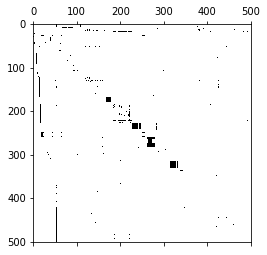

In [62]:
%matplotlib inline
plt.spy(E3)

In [63]:
with open('PageRankEG3.nodelabels') as f:
    labels = f.read().splitlines()

In [102]:
for i in range(10):
    print(i, labels[i])

0 http://www.harvard.edu
1 http://atwork.harvard.edu
2 http://lib.harvard.edu
3 http://www.president.harvard.edu
4 http://www.athletics.harvard.edu
5 http://www.haa.harvard.edu
6 http://search.harvard.edu:8765
7 http://www.fas.harvard.edu
8 http://www.ksg.harvard.edu
9 http://www.hbs.edu


In [65]:
M = make_M_from_E(E3)

In [66]:
M.shape

(500, 500)

In [67]:
d, V = linalg.eig(M)

In [69]:
d[0]

(0.9999999999999983+0j)

In [70]:
v = V[:,0]

In [72]:
perm = np.argsort(v)[::-1]

In [74]:
perm[:10]

array([  0,   9,  41, 129,  17,  14,   8,  16,  45,  12])

In [78]:
for i in range(10):
    print(i, labels[perm[i]])

0 http://www.harvard.edu
1 http://www.hbs.edu
2 http://search.harvard.edu:8765/custom/query.html
3 http://www.med.harvard.edu
4 http://www.gse.harvard.edu
5 http://www.hms.harvard.edu
6 http://www.ksg.harvard.edu
7 http://www.hsph.harvard.edu
8 http://www.gocrimson.com
9 http://www.hsdm.med.harvard.edu


In [79]:
E = sparse.load_npz('webGoogle.npz')

In [80]:
E.shape

(916428, 916428)

In [81]:
d, V = spla.eigs(E)

In [82]:
d

array([ 37.6396+0.j, -29.4205+0.j,  32.8955+0.j,  31.7113+0.j,
        25.9948+0.j,  25.5653+0.j])

In [83]:
E = np.load('PageRankEG1.npy')
E

array([[0., 0., 1., 1.],
       [1., 0., 0., 0.],
       [1., 1., 0., 1.],
       [1., 1., 0., 0.]])

In [84]:
M = make_M_from_E(E)
M

array([[0.0375, 0.0375, 0.8875, 0.4625],
       [0.3208, 0.0375, 0.0375, 0.0375],
       [0.3208, 0.4625, 0.0375, 0.4625],
       [0.3208, 0.4625, 0.0375, 0.0375]])

In [99]:
x = np.ones(4)/4
x

array([0.25, 0.25, 0.25, 0.25])

In [100]:
# Power Method
for i in range(100):
    x = M @ x
    x = x / npla.norm(x)
x

array([0.6965, 0.2683, 0.5448, 0.3823])

In [94]:
d, V = linalg.eig(M)
V[:,0].real

array([0.6965, 0.2683, 0.5448, 0.3823])